#### Explorer la différence entre les kmeans et les mélanges de gausiennes. Pour cela les données sont générées artificiellement.  



# Génération des données

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import random

np.random.seed(3) # pour être reproductible
m1 = np.zeros(2)  # moyenne de la première gaussienne 
m2 = np.ones(2)*4 # pour la seconde 
#m1[1]=4
cov1 = np.eye(2)*1 # variance 1
cov2 = np.eye(2)*2 # variance 2
#cov1[0,0]= 4
#cov1[1,1]=0.5
print cov1
print cov2

# En générant différents nombre de points pour chaque cluster,
# on simule une probabilité à priori différente pour chaque cluster. 
N1=500 # nombre de points pour le premier cluster
N2=1500 # nombre de points pour le second cluster
    

[[ 1.  0.]
 [ 0.  1.]]
[[ 2.  0.]
 [ 0.  2.]]


In [2]:
# Génération 
data1= np.random.multivariate_normal(m1,cov1,N1)
data2= np.random.multivariate_normal(m2,cov2,N2)

alldata = np.zeros((N1+N2,2))
alldata[0:N1,:] = data1
alldata[N1:,:] = data2
print data1.shape, data2.shape, alldata.shape


(500, 2) (1500, 2) (2000, 2)


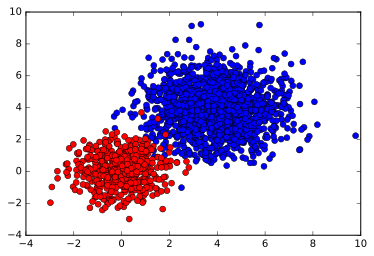

In [3]:
plt.plot(data2[:,0], data2[:,1],'bo')
plt.plot(data1[:,0], data1[:,1],'ro')


# K-means




In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
affk = kmeans.fit_predict(alldata)

centers=kmeans.cluster_centers_

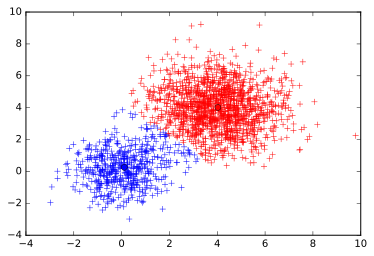

In [5]:
line = affk==0
plt.plot(alldata[line,0],alldata[line,1], "r+")
plt.plot(centers[0][0],centers[0][1],'ro')
line = affk==1
plt.plot(alldata[line,0],alldata[line,1], "b+")
plt.plot(centers[1][0],centers[1][1],'bo')

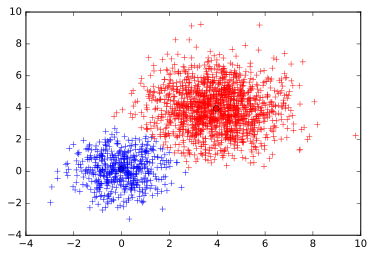

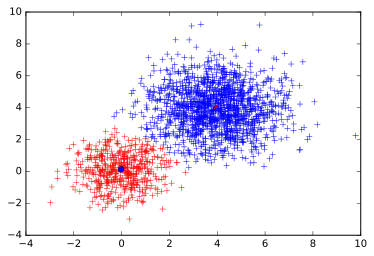

In [6]:
from sklearn.mixture import GaussianMixture
g = GaussianMixture(n_components=2,covariance_type='full',init_params='kmeans')
gd= GaussianMixture(n_components=2,covariance_type='diag',init_params='kmeans')

g.fit(alldata)
gd.fit(alldata)

affg=g.predict(alldata)
affgd=gd.predict(alldata)


line = affg==0
plt.plot(alldata[line,0],alldata[line,1], "r+")
plt.plot(g.means_[0][0],g.means_[0][1],'ro')
line = affg==1
plt.plot(alldata[line,0],alldata[line,1], "b+")
plt.plot(g.means_[1][0],g.means_[1][1],'bo')
plt.show()

line = affgd==0
plt.plot(alldata[line,0],alldata[line,1], "r+")
plt.plot(g.means_[0][0],g.means_[0][1],'ro')
line = affgd==1
plt.plot(alldata[line,0],alldata[line,1], "b+")
plt.plot(g.means_[1][0],g.means_[1][1],'bo')

In [7]:
diff = affk==affg

In [8]:
print "Diff between kmeans and GMM", diff.sum()
# KMEANS


error = 100.0*(N1-affk[0:N1].sum() + affk[N1:].sum())/(N1+N2)
print error

error = 100.0*(N1-affg[0:N1].sum() + affg[N1:].sum())/(N1+N2)
print error

Diff between kmeans and GMM 1954
2.95
1.05


# Try again

[[ 4.   0. ]
 [ 0.   0.1]]
[[ 2.  0.]
 [ 0.  2.]]
(500, 2) (1500, 2) (2000, 2)


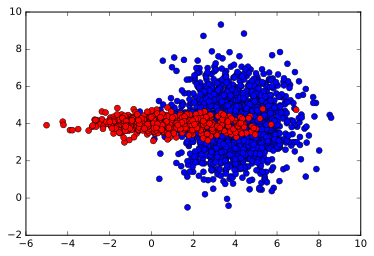

In [9]:
m1 = np.zeros(2)+1  # moyenne de la première gaussienne 
m2 = np.ones(2)*4 # pour la seconde 
m1[1]=4
cov1 = np.eye(2)*1 # variance 1
cov2 = np.eye(2)*2 # variance 2
cov1[0,0]=4
cov1[1,1]=0.1
print cov1
print cov2

# En générant différents nombre de points pour chaque cluster,
# on simule une probabilité à priori différente pour chaque cluster. 
N1=500 # nombre de points pour le premier cluster
N2=1500 # nombre de points pour le second cluster
    
    
# Génération 
data1= np.random.multivariate_normal(m1,cov1,N1)
data2= np.random.multivariate_normal(m2,cov2,N2)

alldata = np.zeros((N1+N2,2))
alldata[0:N1,:] = data1
alldata[N1:,:] = data2
print data1.shape, data2.shape, alldata.shape

plt.plot(data2[:,0], data2[:,1],'bo')
plt.plot(data1[:,0], data1[:,1],'ro')


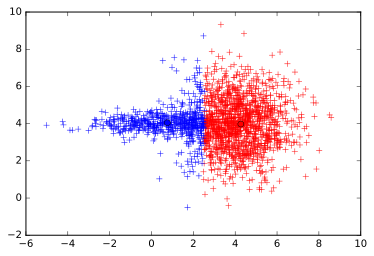

1495
505


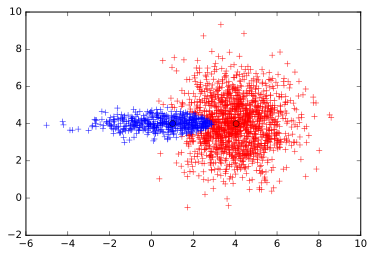

In [10]:
kmeans = KMeans(n_clusters=2, random_state=0)
affk = kmeans.fit_predict(alldata)

centers=kmeans.cluster_centers_
line = affk==0
plt.plot(alldata[line,0],alldata[line,1], "r+")
plt.plot(centers[0][0],centers[0][1],'ro')
line = affk==1
plt.plot(alldata[line,0],alldata[line,1], "b+")
plt.plot(centers[1][0],centers[1][1],'bo')
plt.show()


#### GMM 
g = GaussianMixture(n_components=2,covariance_type='diag',init_params='kmeans')
g.fit(alldata)
affg=g.predict(alldata)

print (affg==0).sum()
print (affg==1).sum()
line = affg==0
plt.plot(alldata[line,0],alldata[line,1], "r+")
plt.plot(g.means_[0][0],g.means_[0][1],'ro')
line = affg==1
plt.plot(alldata[line,0],alldata[line,1], "b+")
plt.plot(g.means_[1][0],g.means_[1][1],'bo')
plt.show()


In [11]:
print "Diff between kmeans and GMM", diff.sum()
# KMEANS


error = 100.0*(N1-affk[0:N1].sum() + affk[N1:].sum())/(N1+N2)
print error

error = 100.0*(N1-affg[0:N1].sum() + affg[N1:].sum())/(N1+N2)
print error

Diff between kmeans and GMM 1954
16.0
9.75


536
581
516
367


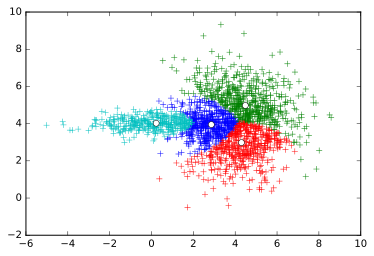

In [12]:
#### GMM 
K=4
g = GaussianMixture(n_components=K,covariance_type='full',init_params='kmeans')
g.fit(alldata)
affg=g.predict(alldata)
for k in range(K):
    print (affg==k).sum()
    line = affg==k
    plt.plot(alldata[line,0],alldata[line,1], "+")
    plt.plot(g.means_[k][0],g.means_[k][1],'wo')

plt.show()

536
581
516
367


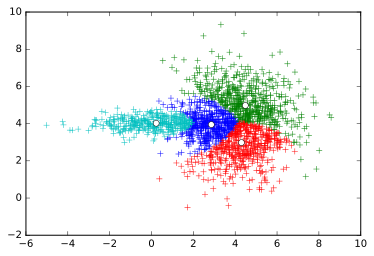

In [13]:
kmeans = KMeans(n_clusters=K, random_state=0)
affk = kmeans.fit_predict(alldata)
centers=kmeans.cluster_centers_

for k in range(K):
    print (affg==k).sum()
    line = affg==k
    plt.plot(alldata[line,0],alldata[line,1], "+")
    plt.plot(g.means_[k][0],g.means_[k][1],'wo')
plt.show()



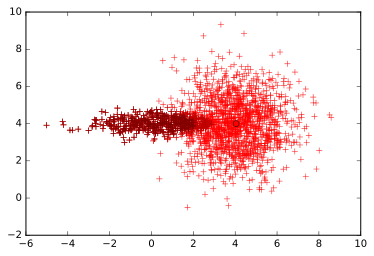

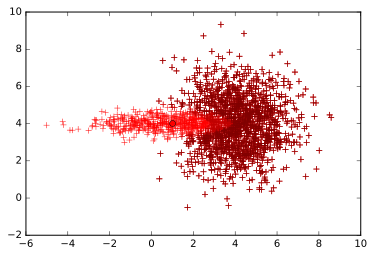

In [14]:
#### Posterior probabilities
n_comp = 2
front = [1., 0.75, 0.5, 0.25, 0.]
colors = [(1.*i, 0, 0) for i in front[:-1]]

g = GaussianMixture(n_components=n_comp,covariance_type='diag',init_params='kmeans')
g.fit(alldata)
affg=g.predict_proba(alldata)

for i in range(n_comp):
    for j, (v1, v2) in enumerate(zip(front[1:], front[:-1])):
        affg_v = affg[:,i]>v1 
        line = affg_v<=v2     
        plt.plot(alldata[line,0],alldata[line,1],'+', color=colors[j])
    plt.plot(g.means_[i][0],g.means_[i][1],'ro')
    plt.show()